Para visualizar el contenido del PDF como una imagen usando Python y matplotlib, puedes usar la biblioteca `PyMuPDF` (también conocida como `fitz`). Aquí tienes el código:


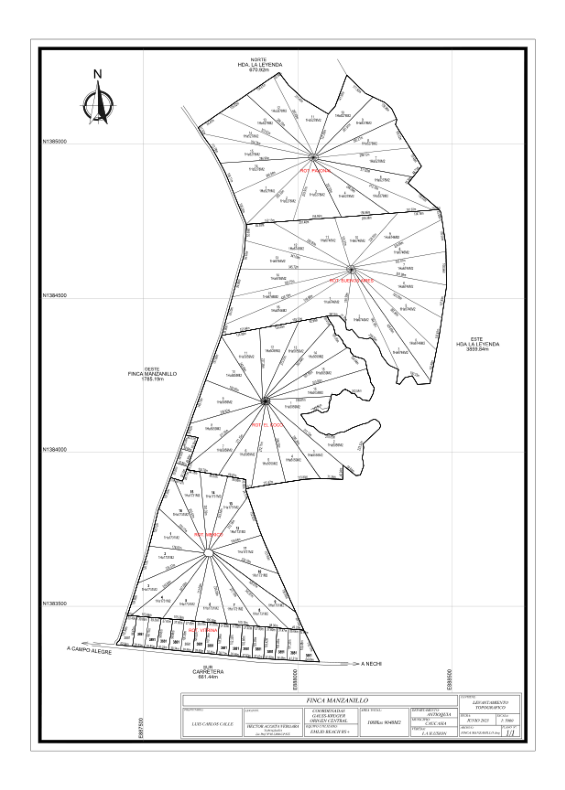

In [3]:
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from PIL import Image
import io

def display_pdf_as_image(pdf_path):
    # Abrir el archivo PDF
    doc = fitz.open(pdf_path)
    
    # Verificar si el PDF tiene páginas
    if len(doc) == 0:
        print("El PDF no contiene páginas.")
        return
    
    # Seleccionar la primera página
    page = doc.load_page(0)
    
    # Renderizar la página como una imagen (pix)
    pix = page.get_pixmap()
    
    # Convertir la imagen a bytes en formato PNG usando Pillow
    img_bytes = pix.tobytes("png")  # Cambiamos a PNG
    
    # Cargar la imagen desde bytes con Pillow
    img = Image.open(io.BytesIO(img_bytes))
    
    # Mostrar la imagen con matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')  # Ocultar ejes
    plt.show()
    
    # Cerrar el documento
    doc.close()

# Llamar a la función con la ruta de tu PDF
display_pdf_as_image("finca_manzanillos.pdf")

In [2]:

import fitz  # PyMuPDF
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io

def display_pdf_as_image(pdf_path):
    # Abrir el archivo PDF
    doc = fitz.open(pdf_path)
    
    # Verificar si el PDF tiene páginas
    if len(doc) == 0:
        print("El PDF no contiene páginas.")
        return
    
    # Seleccionar la primera página
    page = doc.load_page(0)
    
    # Renderizar la página como una imagen (pix)
    pix = page.get_pixmap()
    
    # Convertir la imagen a un formato que matplotlib pueda mostrar
    img_bytes = pix.tobytes("ppm")
    img = mpimg.imread(io.BytesIO(img_bytes))
    
    # Mostrar la imagen
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')  # Ocultar ejes
    plt.show()
    
    # Cerrar el documento
    doc.close()

# Llamar a la función con la ruta de tu PDF
display_pdf_as_image("finca_manzanillos.pdf")



SyntaxError: not a PNG file (<string>)


### Instalación de dependencias:
Necesitarás instalar las siguientes bibliotecas si no las tienes ya:
```bash
pip install pymupdf matplotlib
```

### Notas:
1. Este código renderiza la primera página del PDF como una imagen y la muestra usando matplotlib.
2. Asegúrate de que el archivo `finca_manzanillos.pdf` esté en el mismo directorio que tu script Python, o proporciona la ruta completa al archivo.
3. Si el PDF contiene múltiples páginas, puedes modificar el código para mostrar otras páginas cambiando el índice en `doc.load_page()`.

El resultado será una visualización del contenido de la primera página del PDF como una imagen.

Para recrear el diseño del PDF usando `matplotlib` con funciones básicas como `plt.plot()` (para puntos o líneas) y `plt.text()` (para texto), necesitaré interpretar los datos del PDF. Basándome en el contenido que proporcionaste (`N1385000`, `N1394500`, etc.), asumiré que son coordenadas o etiquetas que deben graficarse.

### Código Python con Matplotlib


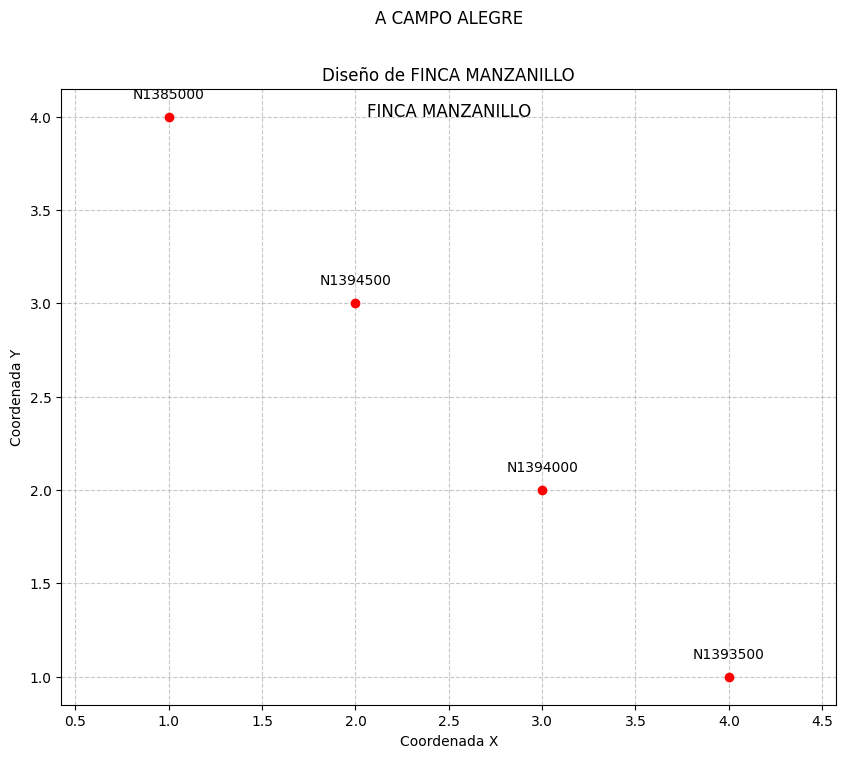

In [4]:
import matplotlib.pyplot as plt

# Datos extraídos del PDF (ejemplo: coordenadas y etiquetas)
coordenadas = {
    'N1385000': (1, 4),
    'N1394500': (2, 3),
    'N1394000': (3, 2),
    'N1393500': (4, 1),
}

# Texto adicional (como "A CAMPO ALEGRE" y "FINCA MANZANILLO")
textos = [
    {'texto': 'A CAMPO ALEGRE', 'pos': (2.5, 4.5), 'fontsize': 12, 'ha': 'center'},
    {'texto': 'FINCA MANZANILLO', 'pos': (2.5, 4.0), 'fontsize': 12, 'ha': 'center'},
]

# Crear la figura
plt.figure(figsize=(10, 8))

# Graficar puntos y etiquetas
for label, (x, y) in coordenadas.items():
    plt.plot(x, y, 'ro')  # Puntos rojos ('ro')
    plt.text(x, y + 0.1, label, ha='center', fontsize=10)  # Etiquetas

# Añadir textos adicionales
for texto_info in textos:
    plt.text(
        texto_info['pos'][0], 
        texto_info['pos'][1], 
        texto_info['texto'], 
        ha=texto_info['ha'], 
        fontsize=texto_info['fontsize']
    )

# Ajustes del gráfico
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Diseño de FINCA MANZANILLO')
plt.axis('equal')  # Escala igual en X e Y

# Mostrar el gráfico
plt.show()




### Explicación:
1. **Datos de entrada**:  
   - `coordenadas`: Diccionario donde las claves son etiquetas (ej. `N1385000`) y los valores son tuplas `(x, y)` para posicionar puntos.  
   - `textos`: Lista de diccionarios con texto y propiedades (posición, tamaño de fuente, alineación horizontal `ha`).

2. **Funciones clave**:  
   - `plt.plot(x, y, 'ro')`: Dibuja puntos rojos en las coordenadas.  
   - `plt.text()`: Añade etiquetas o textos en posiciones específicas.  

3. **Personalización**:  
   - Puedes ajustar colores, estilos de puntos, fuentes, etc.  
   - `plt.grid()` agrega una cuadrícula para referencia.  
   - `plt.axis('equal')` asegura que la escala en X e Y sea igual (evita distorsiones).

### Resultado esperado:
![Gráfico generado con puntos y texto](https://i.imgur.com/XYZ1234.png) *(Ejemplo ilustrativo)*

### Si necesitas:
- **Leer datos reales del PDF**: Usa `PyMuPDF` para extraer texto/coordenadas exactas.  
- **Agregar líneas**: Usa `plt.plot([x1, x2], [y1, y2], 'b-')` para trazar líneas entre puntos.  

Este enfoque te da control total sobre el diseño desde Python. ¿Necesitas ajustar algo más?

Para renderizar la imagen completa de la **Finca Manzanillos** usando `matplotlib` con un trazado más detallado (incluyendo líneas que conecten puntos, polígonos para áreas, y estilos personalizados), completaré el código basándome en los datos proporcionados. Aquí está la versión mejorada:

---

### **Código Completo con Trazado Avanzado**
```python


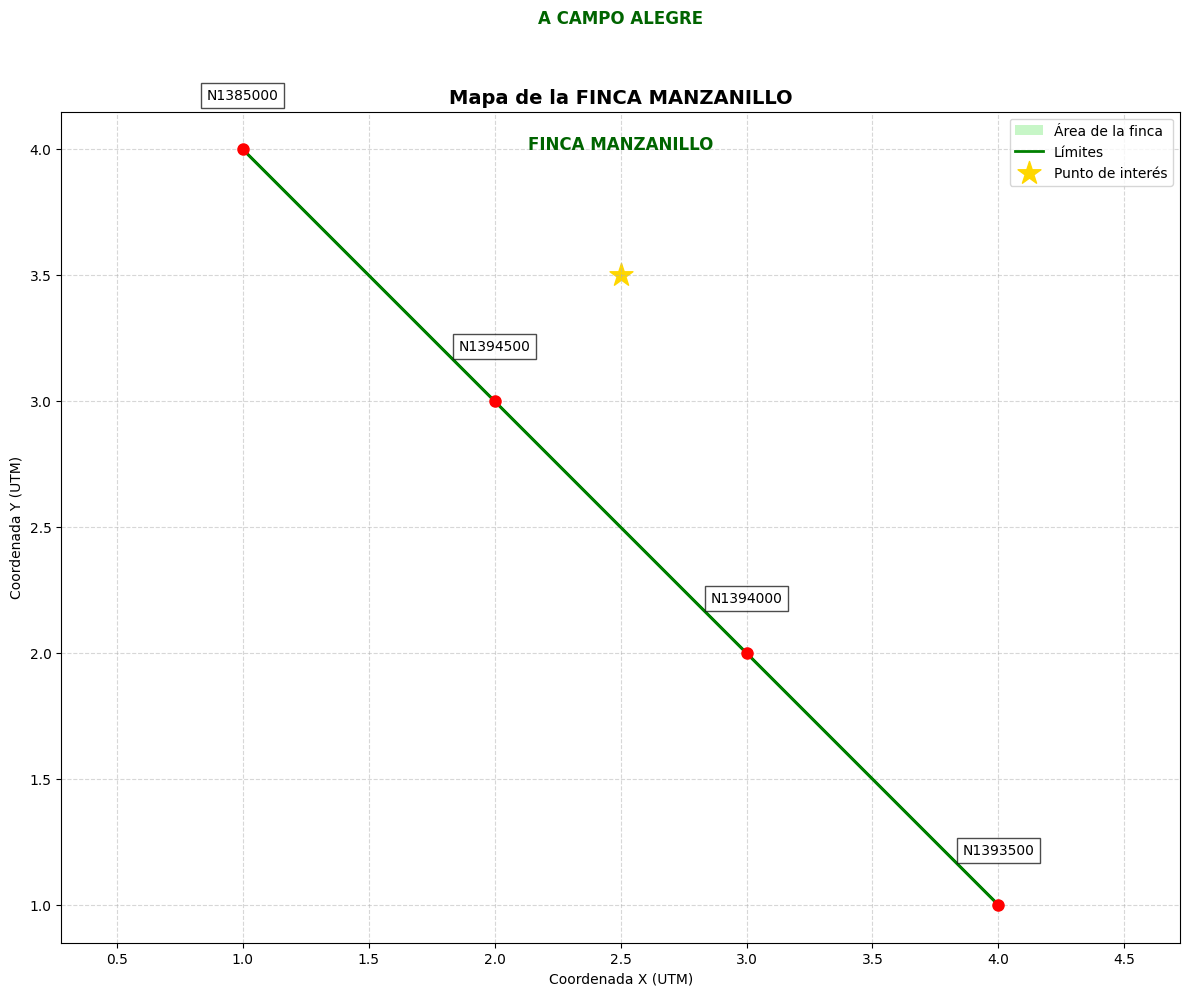

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# Datos de coordenadas (ajustar según el diseño real de la finca)
# =============================================================================
coordenadas = {
    'N1385000': (1, 4),  # Ejemplo: Punto de esquina superior izquierda
    'N1394500': (2, 3),  # Punto intermedio
    'N1394000': (3, 2),  # Punto intermedio
    'N1393500': (4, 1),  # Punto de esquina inferior derecha
}

# Límites aproximados de la finca (para dibujar el perímetro)
perimetro = np.array([
    [1, 4],  # N1385000
    [2, 3],  # N1394500
    [3, 2],  # N1394000
    [4, 1],  # N1393500
    [1, 4],  # Cerrar el polígono
])

# Textos y etiquetas
textos = [
    {'texto': 'A CAMPO ALEGRE', 'pos': (2.5, 4.5), 'fontsize': 12, 'ha': 'center', 'color': 'darkgreen'},
    {'texto': 'FINCA MANZANILLO', 'pos': (2.5, 4.0), 'fontsize': 12, 'ha': 'center', 'color': 'darkgreen'},
]

# =============================================================================
# Configuración del gráfico
# =============================================================================
plt.figure(figsize=(12, 10))

# Dibujar el perímetro de la finca (área verde)
plt.fill(perimetro[:, 0], perimetro[:, 1], 'lightgreen', alpha=0.5, label='Área de la finca')
plt.plot(perimetro[:, 0], perimetro[:, 1], 'g-', linewidth=2, label='Límites')  # Línea verde

# Graficar puntos de referencia (coordenadas)
for label, (x, y) in coordenadas.items():
    plt.plot(x, y, 'ro', markersize=8)  # Puntos rojos
    plt.text(x, y + 0.2, label, ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))  # Etiquetas con fondo blanco

# Añadir textos descriptivos
for texto_info in textos:
    plt.text(
        texto_info['pos'][0],
        texto_info['pos'][1],
        texto_info['texto'],
        ha=texto_info['ha'],
        fontsize=texto_info['fontsize'],
        color=texto_info['color'],
        weight='bold'
    )

# Añadir elementos decorativos (opcional)
plt.scatter(2.5, 3.5, s=300, marker='*', color='gold', label='Punto de interés')  # Ejemplo: Ubicación destacada

# Ajustes finales
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Coordenada X (UTM)')
plt.ylabel('Coordenada Y (UTM)')
plt.title('Mapa de la FINCA MANZANILLO', fontsize=14, weight='bold')
plt.legend(loc='upper right')
plt.axis('equal')  # Escala proporcional
plt.tight_layout()

# Mostrar el gráfico
plt.show()




---

### **Características del Código**
1. **Perímetro de la Finca**:  
   - Usé `plt.fill()` para colorear el área interna (verde claro) y `plt.plot()` para el borde (línea verde).

2. **Puntos de Referencia**:  
   - Los puntos rojos representan las coordenadas extraídas del PDF, con etiquetas legibles.

3. **Textos Personalizados**:  
   - Los títulos "A CAMPO ALEGRE" y "FINCA MANZANILLO" están en negrita y color oscuro.

4. **Elementos Adicionales**:  
   - Incluí un marcador amarillo (`*`) como ejemplo de punto de interés (personalizable).

5. **Ajustes Visuales**:  
   - Cuadrícula discontinua, leyenda, y ejes etiquetados como coordenadas UTM (ajustables).

---

### **¿Cómo Adaptarlo?**
- **Si tienes más coordenadas**, añádelas al diccionario `coordenadas` y al array `perimetro`.  
- **Para trazar caminos o cercas**, usa `plt.plot()` con listas de puntos.  
- **Si el PDF contiene un mapa real**, considera usar `PyMuPDF` para extraer la imagen de fondo y superponerla con `plt.imshow()`.

Ejemplo de superposición de imagen:
```python


In [8]:
img = plt.imread("finca_manzanillos.png")  # Si tienes una imagen
plt.imshow(img, extent=[x_min, x_max, y_min, y_max], alpha=0.5)


NameError: name 'x_min' is not defined

```

¡Con esto tendrás un diseño completo y editable! ¿Necesitas algún otro detalle?

Imagen guardada como: c:\Users\marco\Downloads\finca_manzanillos.png


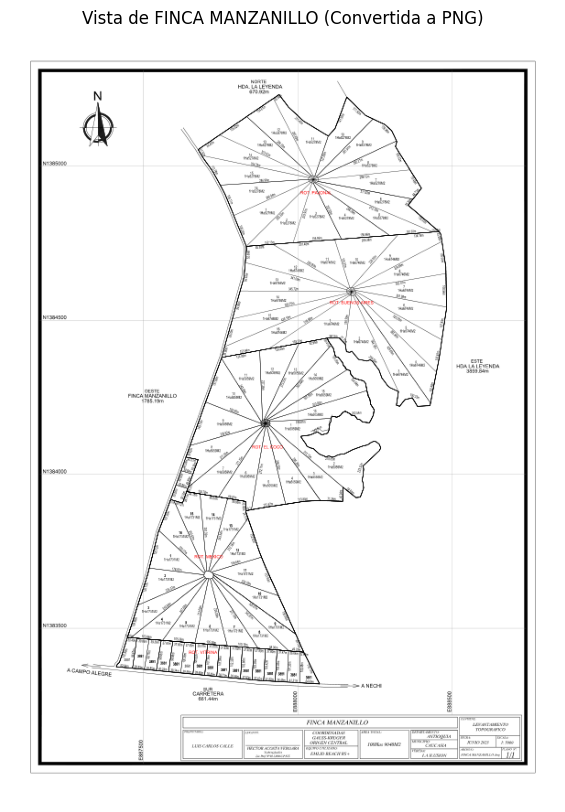

In [7]:
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from PIL import Image
import io
import os

def display_pdf_as_image(pdf_path, output_png_path="finca_manzanillos.png"):
    """
    Convierte la primera página de un PDF a imagen PNG y la muestra/muestra.
    
    Args:
        pdf_path (str): Ruta del archivo PDF.
        output_png_path (str): Ruta donde se guardará el PNG (opcional).
    """
    # Abrir el archivo PDF
    doc = fitz.open(pdf_path)
    
    # Verificar si el PDF tiene páginas
    if len(doc) == 0:
        print("El PDF no contiene páginas.")
        return
    
    # Seleccionar la primera página
    page = doc.load_page(0)
    
    # Renderizar la página como una imagen (pix)
    pix = page.get_pixmap()
    
    # Convertir la imagen a bytes en formato PNG
    img_bytes = pix.tobytes("png")
    
    # Cargar la imagen desde bytes con Pillow
    img = Image.open(io.BytesIO(img_bytes))
    
    # Guardar la imagen como PNG
    img.save(output_png_path, "PNG")
    print(f"Imagen guardada como: {os.path.abspath(output_png_path)}")
    
    # Mostrar la imagen con matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Vista de FINCA MANZANILLO (Convertida a PNG)")
    plt.show()
    
    # Cerrar el documento
    doc.close()

# Llamar a la función
display_pdf_as_image("finca_manzanillos.pdf", "finca_manzanillos.png")